### **Imports and functions defintions**

In [1]:
from numpy import (
    ndarray, max
)
from cv2 import (
    imread, imshow, waitKey, destroyAllWindows, 
    cvtColor, COLOR_BGR2GRAY, calcHist, GaussianBlur
)
from matplotlib.pyplot import (
    plot, title, xlabel, ylabel, show,
    subplot, axis, tight_layout, subplots
)

In [2]:
def display_histogram(img : ndarray, return_hist=False) -> None: 
    
    histogram = calcHist([img], [0], None, [256], [0, 256])

    if return_hist: return histogram
    
    _, axs = subplots(1, 2, figsize=(10, 5))

    # Display the image in the first subplot
    if max(img) > 0:
        axs[0].imshow(img / max(img), cmap='gray', vmin=0, vmax=1)
    else:
        axs[0].imshow(img, cmap='gray', vmin=0, vmax=1)
    axs[0].set_title('Image')
    axs[0].axis('off')

    # Display the histogram in the second subplot
    axs[1].plot(histogram)
    axs[1].set_title('Image Histogram')
    axs[1].set_xlabel('Pixel Value')
    axs[1].set_ylabel('Frequency')

    tight_layout()

In [3]:
from cv2 import (
    threshold, THRESH_BINARY, THRESH_OTSU, findContours, 
    RETR_EXTERNAL, CHAIN_APPROX_SIMPLE, drawContours, FILLED, bitwise_and
)

from numpy import zeros_like

def segmentation_threshold(img : ndarray, cut_off : int = 0 ) -> ndarray:

    # _, thresh = threshold(img, 0, 255, THRESH_BINARY + THRESH_OTSU)
    _, thresh = threshold(img, cut_off, 255, THRESH_BINARY)
    
    # Find contours
    contours, _ = findContours(thresh, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE)

    # Create a mask for the segmented objects
    segmented_mask = zeros_like(img)
    
    # Draw contours on the mask
    drawContours(segmented_mask, contours, -1, (255), thickness=FILLED)
    
    # Bitwise AND operation to extract segmented objects
    segmented_image = bitwise_and(img, img, mask=segmented_mask)

    return segmented_image

In [4]:
import numpy as np
from scipy.signal import find_peaks
import cv2
import matplotlib.pyplot as plt

def find_peaks_in_hist(img, hist, threshold):

    # for i, val in enumerate(hist): 
    #     if val != 0: print(i, val)
            
    # Flatten the histogram for peak finding
    hist_flat = hist.flatten()
    
    # Find peaks in the histogram
    peaks, _ = find_peaks(hist_flat, height=threshold)  # You can set an appropriate threshold

    # Display the original image
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Display the histogram
    plt.subplot(2, 1, 2)
    plt.plot(hist_flat, color='black')
    plt.plot(peaks, hist_flat[peaks], 'x', color='red', markeredgewidth=2, markersize=8)
    plt.title('Histogram with Peaks')

    return peaks

In [5]:
def display_peaks(img, peaks):

    # Display subplots for each peak
    for i, peak in enumerate(peaks):
        plt.figure()
        plt.imshow((img == peak).astype(np.uint8), cmap='gray')
        plt.title(f'Peak {i + 1}')

In [6]:
example_image_path = "..\\..\\foto\\image_20_0x_00175_22_6.png"

def read_image(path=example_image_path):
    img = imread(path)
    img = cvtColor(img, COLOR_BGR2GRAY)
    return img

img = read_image()

### **Histograms**

### Original photo

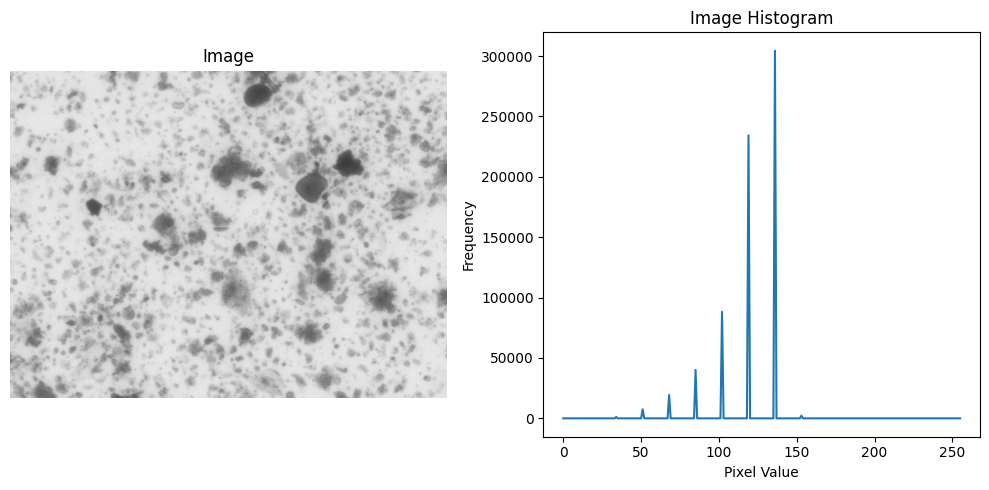

In [7]:
img = read_image()
display_histogram(img)
show()

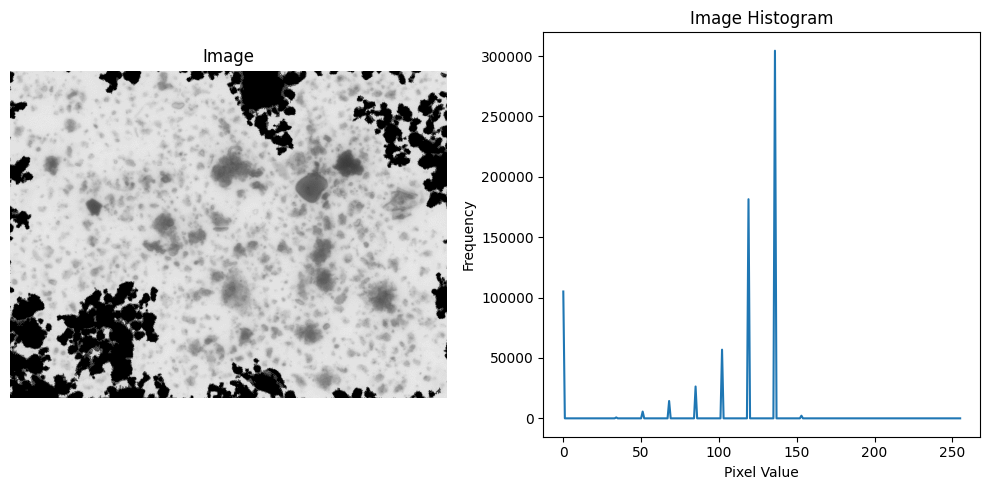

In [8]:
img = read_image()
img = segmentation_threshold(img, cut_off=130)
display_histogram(img)
show()

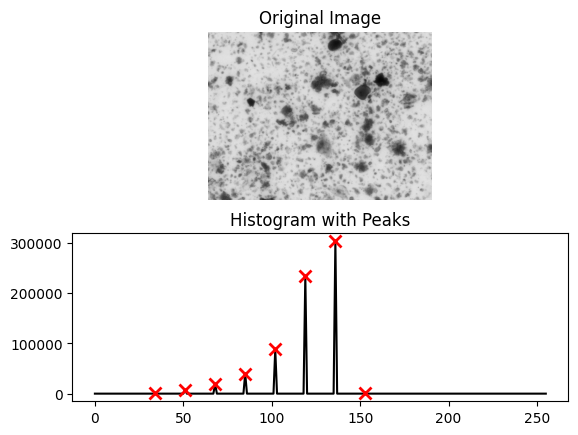

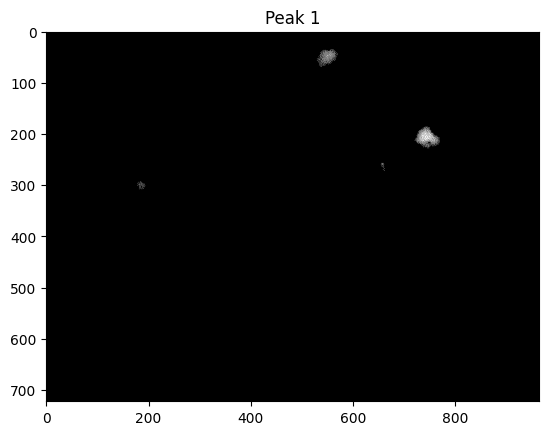

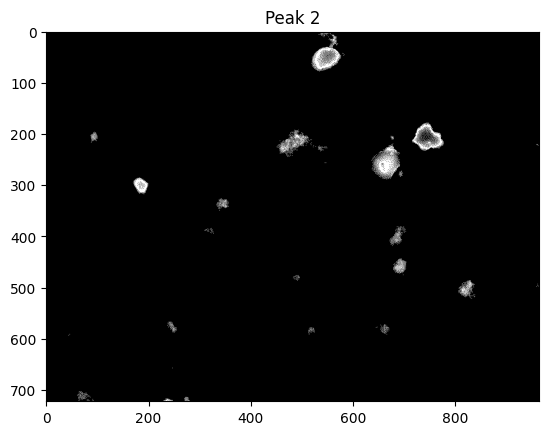

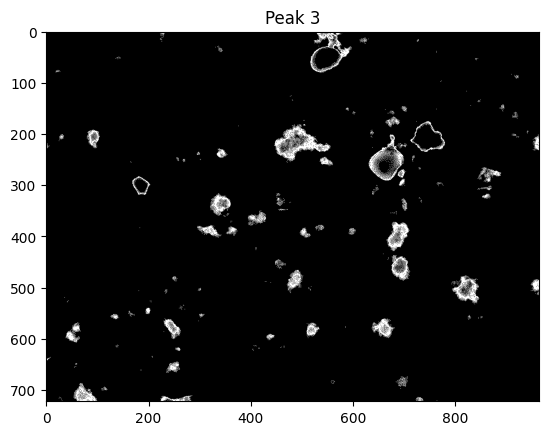

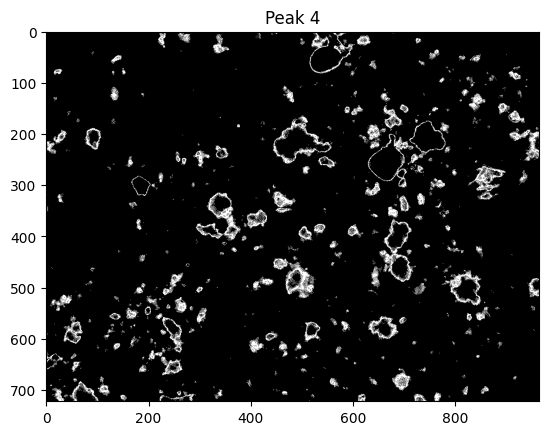

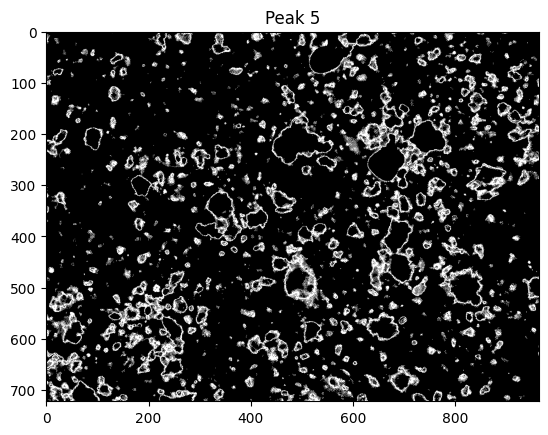

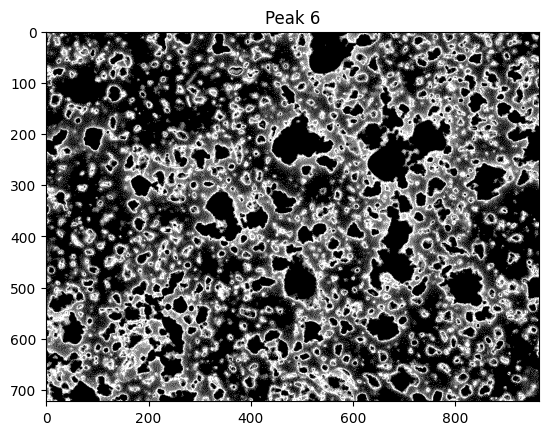

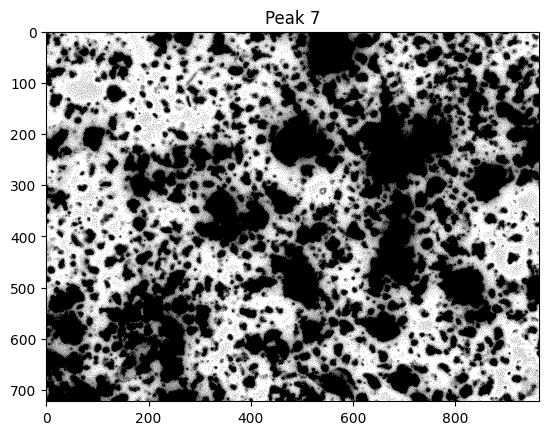

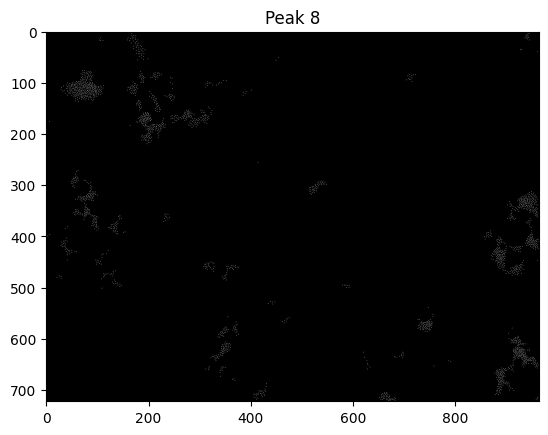

In [9]:
img = read_image()
hist = display_histogram(img, return_hist=True)
peaks = find_peaks_in_hist(img=img, hist=hist, threshold=0)
display_peaks(img=img, peaks=peaks)
show()

[ 34  51  68  85 102 119 136 153]


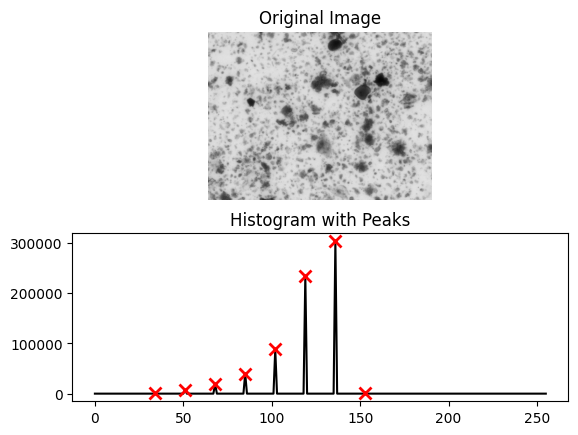

In [10]:
img = read_image()
hist = display_histogram(img, return_hist=True)
peaks = find_peaks_in_hist(img=img, hist=hist, threshold=0)
print(peaks)
show()

### Blur photo

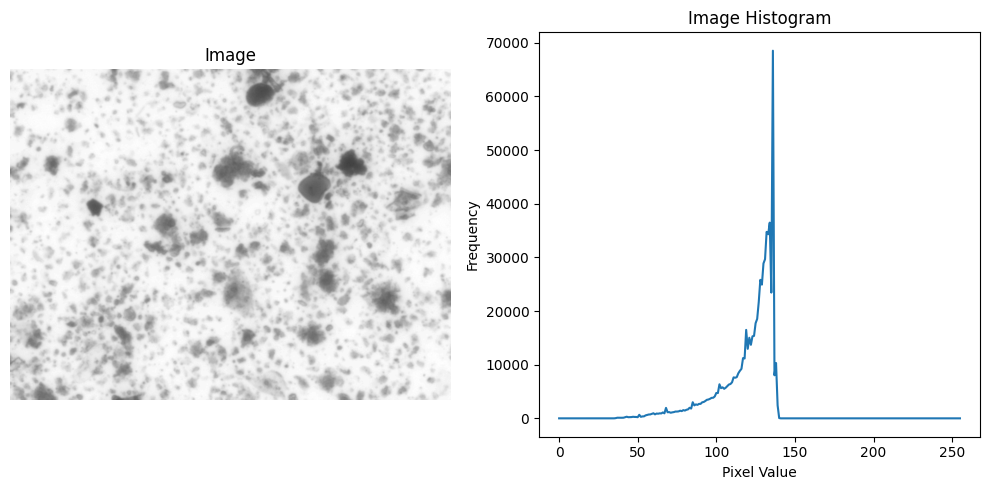

In [11]:
img = read_image()
img = GaussianBlur(img, (5, 5), 0)
display_histogram(img)
show()

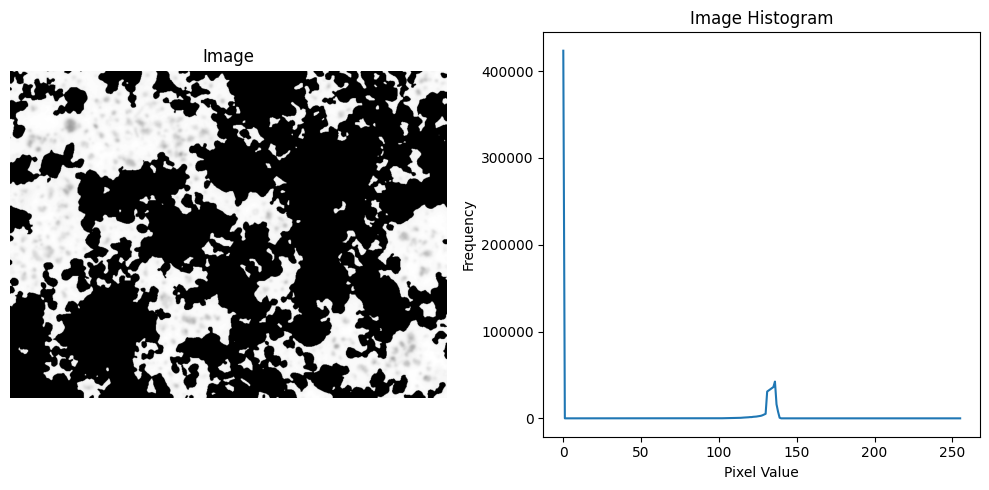

In [12]:
img = read_image()
img = GaussianBlur(img, (11, 11), 0)
img = segmentation_threshold(img, cut_off=130)
display_histogram(img)
show()

C:\Users\pc\AppData\Local\Temp\ipykernel_17212\2809535118.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


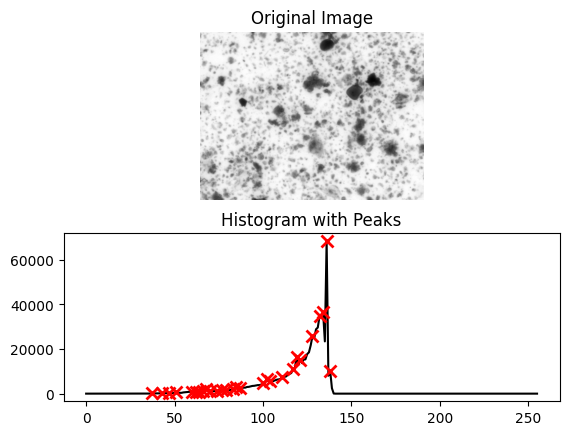

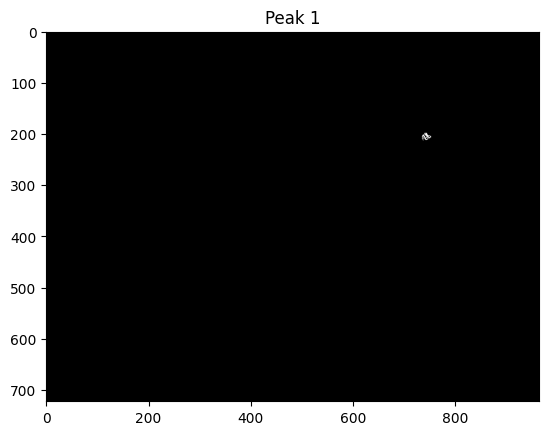

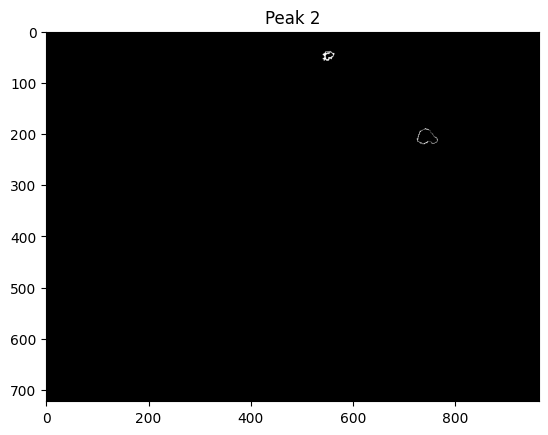

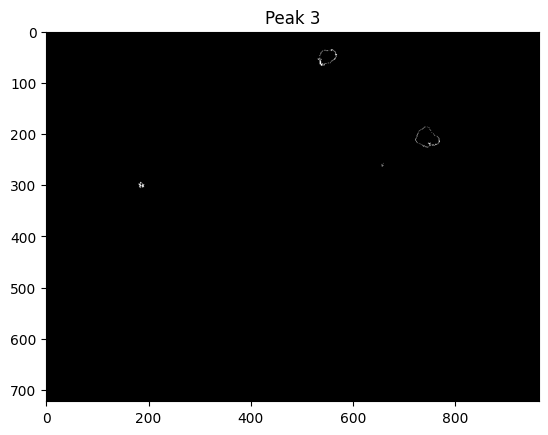

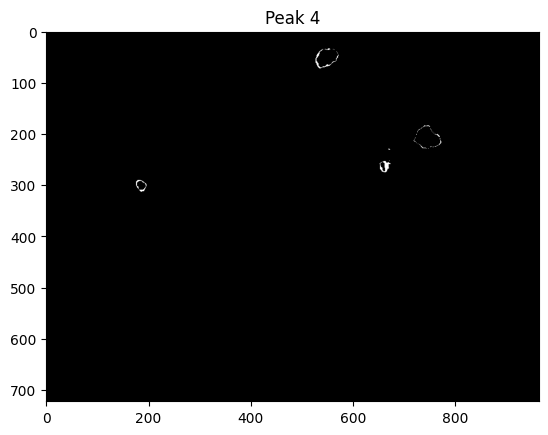

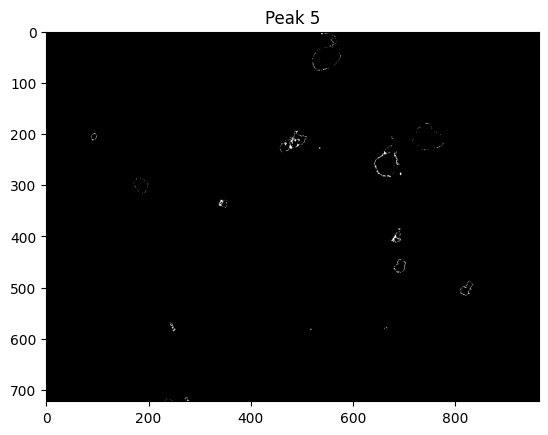

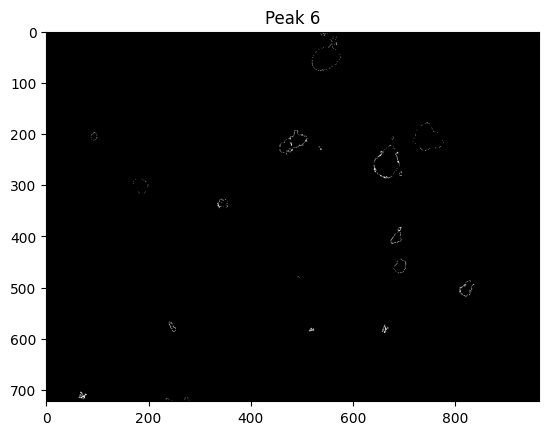

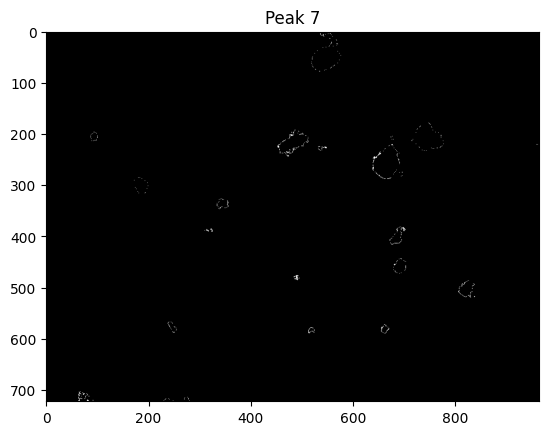

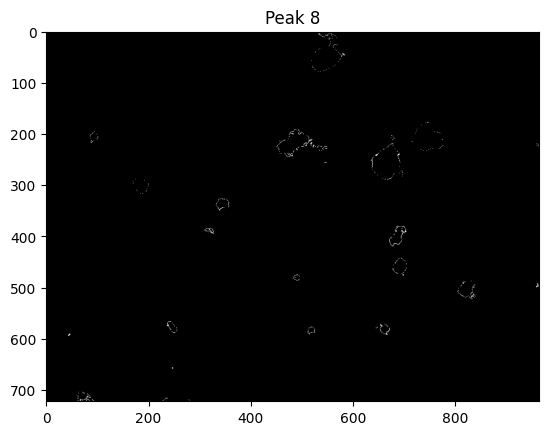

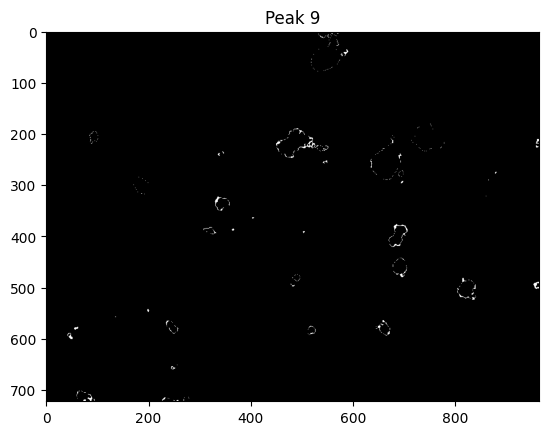

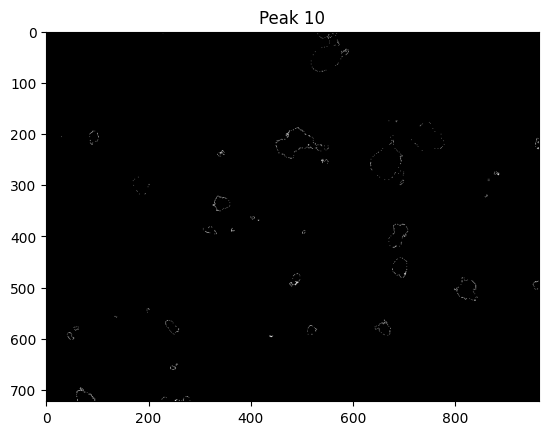

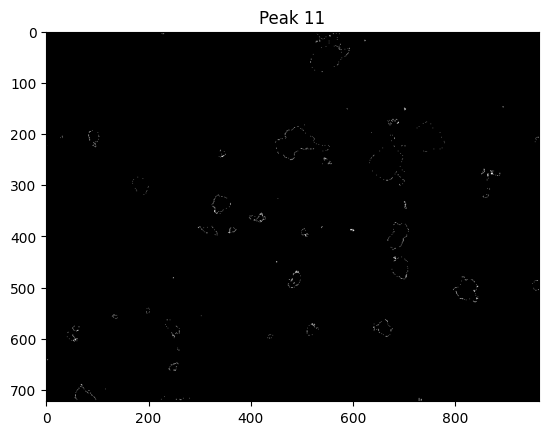

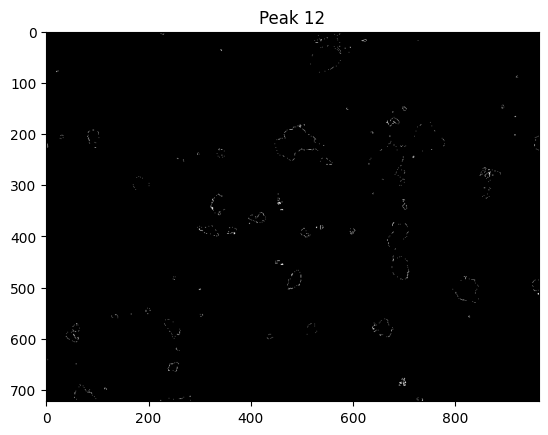

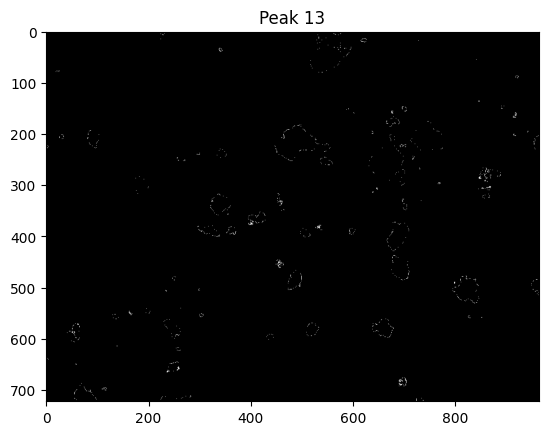

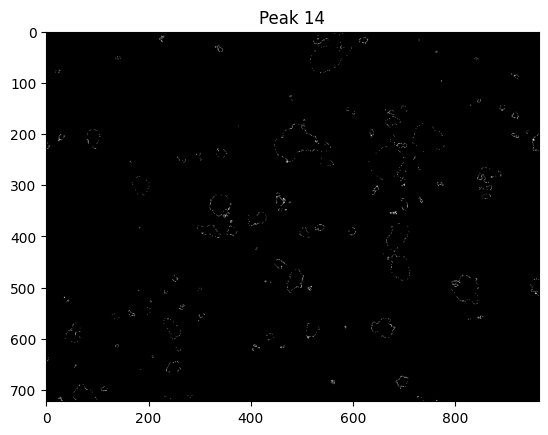

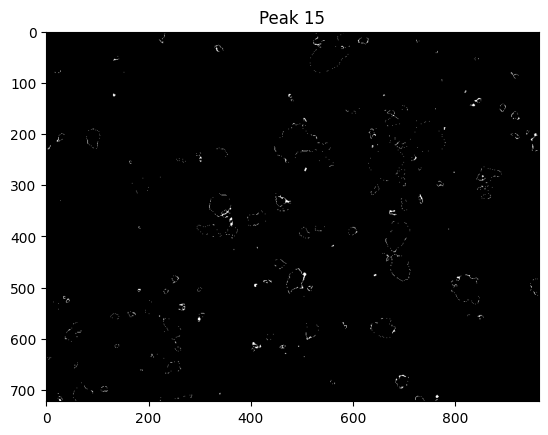

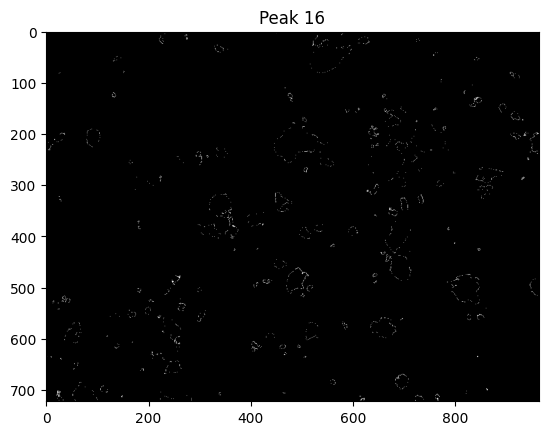

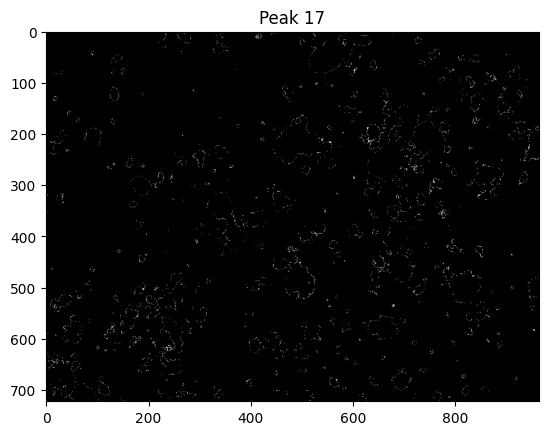

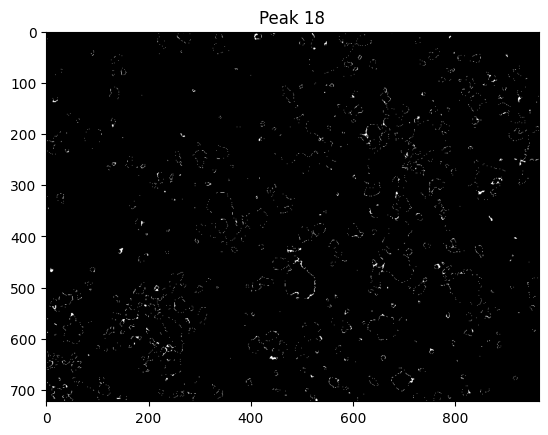

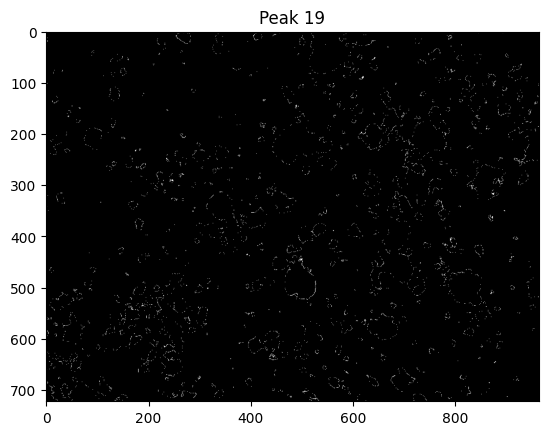

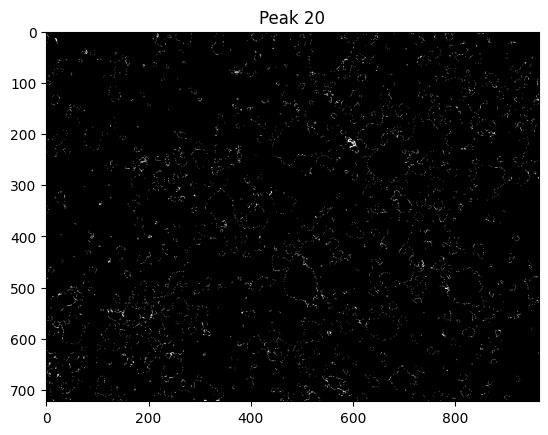

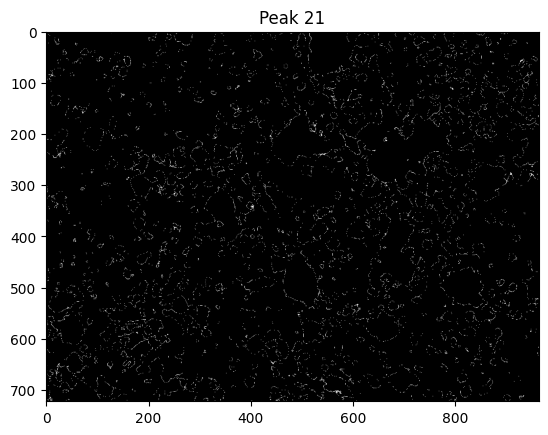

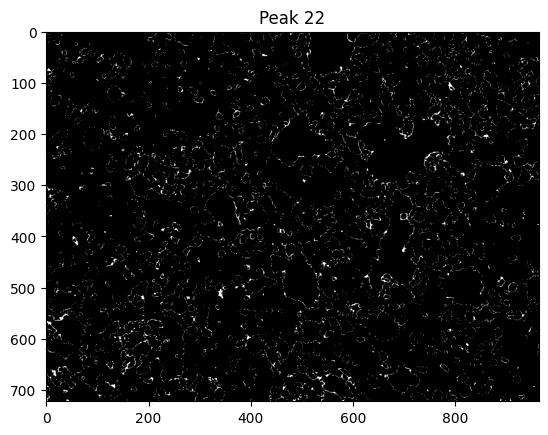

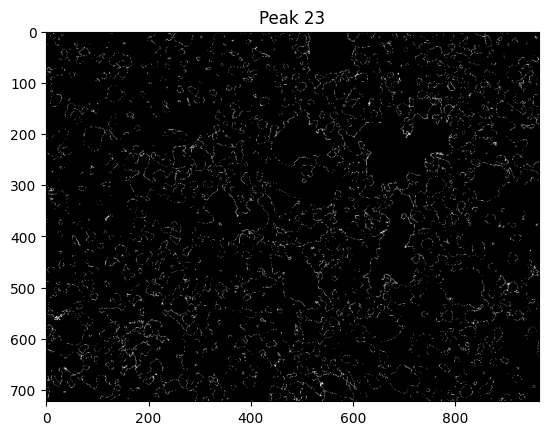

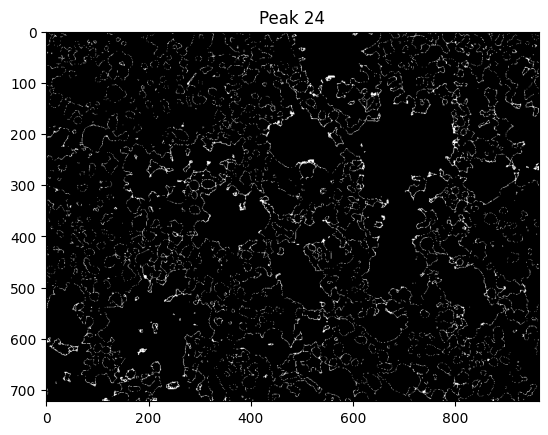

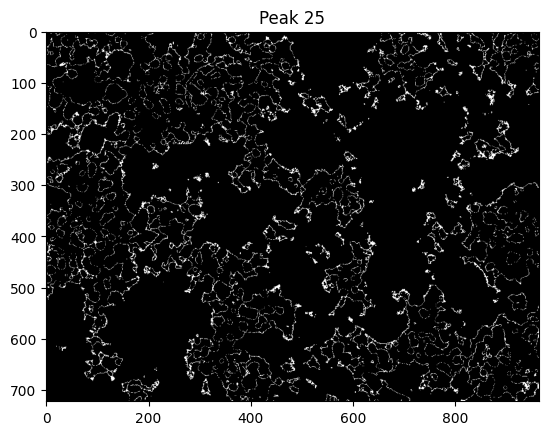

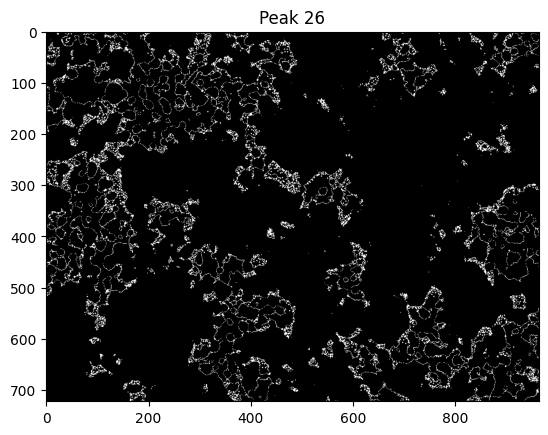

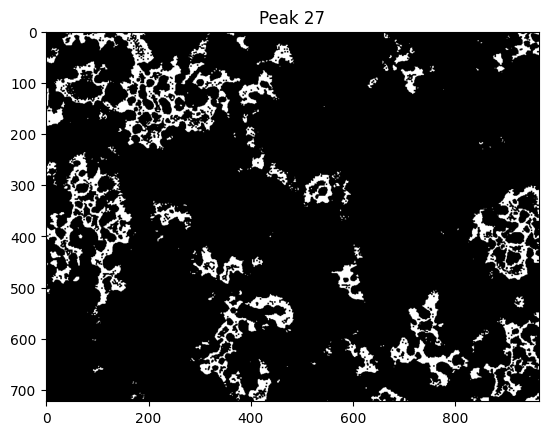

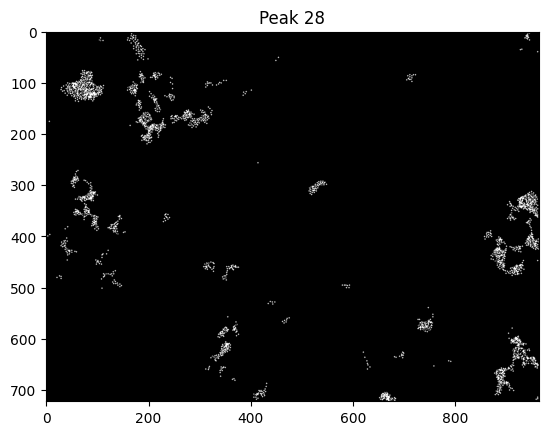

In [13]:
img = read_image()
img = GaussianBlur(img, (5, 5), 0)
hist = display_histogram(img, return_hist=True)
peaks = find_peaks_in_hist(img=img, hist=hist, threshold=0)
display_peaks(img=img, peaks=peaks)
show()